In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
import tensorflow as tf

data = pd.read_csv("data/airfoil-noise.dat", sep="\t", header=None)
data = np.array(data)


C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Splitting into training and test
X_train, X_test, y_train, y_test = sk.train_test_split(data[:,:-1],data[:,-1],test_size=0.33, random_state = 42)

In [3]:
# Linear Regression
# Placeholder, Constants and Variables (if any)
X = tf.placeholder("float", shape=X_train.shape, name="train-x")
Y = tf.placeholder("float", shape=y_train.shape, name="train-y")
# learning_rate = tf.constant(0.01, dtype=tf.float32)
learning_rate = 0.1
epochs = 500
step = 50
W = tf.Variable(tf.random_normal([X_train.shape[1],1]), name="weights")
b = tf.Variable(np.random.randn(), name="bias")

In [4]:
# Our Hypothesis
hypothesis = tf.add(tf.matmul(X,W), b)

In [5]:
# Computing cost (mean squared error)
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2))/(2*X_train.shape[0])

In [11]:
# Optimizer
optimizer_grad = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer_momentum = tf.train.MomentumOptimizer(momentum=0.01,learning_rate=learning_rate).minimize(cost)
optimizer_adagrad = tf.train.AdagradOptimizer(learning_rate).minimize(cost)
optimizer_ftrl = tf.train.FtrlOptimizer(learning_rate).minimize(cost)

Epoch  0050 Training Cost  4863122400.0 Test cost  1939132835.8241293
Epoch  0100 Training Cost  1430817200.0 Test cost  566964590.686303
Epoch  0150 Training Cost  458535400.0 Test cost  179407800.10978404
Epoch  0200 Training Cost  156599400.0 Test cost  60260446.96610652
Epoch  0250 Training Cost  60344696.0 Test cost  22989694.451708093
Epoch  0300 Training Cost  29323468.0 Test cost  11376761.149724787
Epoch  0350 Training Cost  19205000.0 Test cost  7807663.2157903155
Epoch  0400 Training Cost  15807805.0 Test cost  6724693.794088751
Epoch  0450 Training Cost  14575650.0 Test cost  6386078.445527659


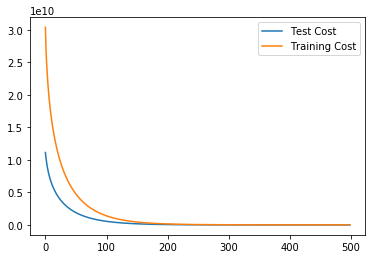

In [27]:
# 
# Gradient descent optimizer and Momentum Optimizer(also uses gradients)  
#  do not work properly for numerically ill-conditioned datasets
# 

with tf.Session() as sess:
    cost_array = []
    tcost_array = []
    sess.run(tf.global_variables_initializer())
#     print(sess.run([cost, W], feed_dict={X:X_train, Y:y_train}))
#     print(sess.run(optimizer_grad, feed_dict={X:X_train, Y:y_train}))
#     print(sess.run([cost, W], feed_dict={X:X_train, Y:y_train}))
#     print(sess.run(optimizer_grad, feed_dict={X:X_train, Y:y_train}))
#     print(sess.run([cost, W], feed_dict={X:X_train, Y:y_train}))
#     print(sess.run(optimizer_grad, feed_dict={X:X_train, Y:y_train}))
    for epoch in range(1, epochs):
        loss = sess.run(cost, feed_dict={X:X_train, Y:y_train})
        cost_array.append(loss)
#         sess.run(optimizer_grad, feed_dict={X:X_train, Y:y_train, cost:loss})
#         sess.run(optimizer_adam, feed_dict={X:X_train, Y:y_train, cost:loss})
#         sess.run(optimizer_momentum, feed_dict={X:X_train, Y:y_train, cost:loss})
        sess.run(optimizer_ftrl, feed_dict={X:X_train, Y:y_train, cost:loss})
#         sess.run(optimizer_adagrad, feed_dict={X:X_train, Y:y_train, cost:loss})
        
        weights, bias = sess.run([W, b])
        # Finding test error
        t_hyp = X_test.dot(weights) + bias
        t_cost = np.sum((t_hyp-y_test)**2)/(2*X_test.shape[0])
        tcost_array.append(t_cost)
        
        if epoch%step == 0:
            
            print ("Epoch ", '%04d' % epoch, "Training Cost ", loss, "Test cost ", t_cost)
    
#     Plotting the error curve
    plt.plot(tcost_array, label='Test Cost')
    plt.plot(cost_array, label='Training Cost')
    plt.legend()
    plt.show()